# Pandas Tutorial

Tutorial introdutório de Pandas. Serão abordados os seguintes tópicos:
1. [Importação](#1)
1. [Estruturas base: Series, DataFrame e Panel](#2)
2. [IO Tools](#3)
3. [Basic functionality](#4)
4. [Descriptive Statistics](#5)
5. [Reindexing](#6)
6. [Iteration](#7)
7. [Sorting](#8)
8. [Working with Text](#9)
9. [Indexing and Selection](#10)
10. [Statistical Functions](#11)
11. [Window Functions](#12)
12. [Aggregations](#13)
13. [Missing Data](#14)
14. [GroupBy](#15)
15. [Merging/Joining](#16)
16. [Concatenation](#17)
17. [Visualization](#18)

Baseado no tutorial da TutorialsPoint:
https://www.tutorialspoint.com/python_pandas/index.htm

## <a name="1">1. Importação</a>

In [2]:
import pandas as pd
import numpy as np # It will be needed

## <a name="2">2. Estruturas base: Series, DataFrame e Panel</a>

### Series

Series é um array unidimensional etiquetado e capaz de conter qualquer tipo (integer, string, float, python objects, etc.). As etiquetas do eixo são chamadas de index.

In [3]:
# Series vazia
s = pd.Series()
print(s)

Series([], dtype: float64)


In [4]:
# Series com 4 linhas, usando listas
data = np.array(['a','b','c','d'])
s = pd.Series(data)
print(s)

0    a
1    b
2    c
3    d
dtype: object


In [5]:
# Definição das labels de indexação (linha)
s = pd.Series(data,index=[100,101,102,103])
print(s)

100    a
101    b
102    c
103    d
dtype: object


In [6]:
# Usar dicionários para criar a Series
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data)
print(s)

a    0.0
b    1.0
c    2.0
dtype: float64


In [7]:
# Definir as labels de indexação. Se não existirem nos
# dados a linha é preenchida com NaN.
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data,index=['b','c','d','a'])
print(s)

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


In [8]:
# Series sempre com o mesmo valor
s = pd.Series(5, index=[0, 1, 2, 3])
print(s)

0    5
1    5
2    5
3    5
dtype: int64


In [9]:
# Indexação da Series por índice
s = pd.Series([1,2,3,4],index=['a','b','c','d'])
print(s[0])

1


In [11]:
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])

print(s[:3]) # numeric indexing
print(s[-3:])# numeric indexing 
print(s['a'])# label indexing
print(s[['a','c','d']])# multiple label indexing
print(s['f'])# Key Error

a    1
b    2
c    3
dtype: int64
c    3
d    4
e    5
dtype: int64
1
a    1
c    3
d    4
dtype: int64


KeyError: 'f'

### DataFrame

Um DataFrame é uma estrutura de dados bidimensional, i.e., semelhante a uma tabela de Excel com linhas e colunas.

In [12]:
# pandas.DataFrame(data,index,columns,dtype,copy)

# DataFrame vazio
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [13]:
# DataFrame com dados de coluna (5 linhas, 1 coluna)
data = [1,2,3,4,5]
df = pd.DataFrame(data)
print(df)

   0
0  1
1  2
2  3
3  4
4  5


In [15]:
# DataFrame 3 linhas, 2 colunas
# Usar listas de pares [val_col1, val_col2]
# Definição das labels de coluna
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print(df)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


In [17]:
# Definição do tipo dos dados
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'], dtype=float)
print(df)

     Name   Age
0    Alex  10.0
1     Bob  12.0
2  Clarke  13.0


In [19]:
# Usar dicionários para criar DataFrame
# Key é label de coluna, lista são valores
data = {'Name':['Tom','Jack','Steve','Ricky'], 
        'Age':[28,34,29,42]}
df = pd.DataFrame(data)
print(df)

   Age   Name
0   28    Tom
1   34   Jack
2   29  Steve
3   42  Ricky


In [20]:
# Definir labels para linhas
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print(df)

       Age   Name
rank1   28    Tom
rank2   34   Jack
rank3   29  Steve
rank4   42  Ricky


In [22]:
# Criação com lista de dicionários
# Cada dicionário é uma linha
# Cada key de dicionário define uma coluna
data = [{'a':1, 'b':2},{'a':5, 'b':10, 'c':20}]
df = pd.DataFrame(data)
print(df)

   a   b     c
0  1   2   NaN
1  5  10  20.0


In [23]:
# Definir labels para linhas
df = pd.DataFrame(data, index=['first','second'])
print(df)

        a   b     c
first   1   2   NaN
second  5  10  20.0


In [26]:
df1 = pd.DataFrame(data,index=['first','second'], 
                   columns=['a','b'])
# Utilização de coluna que não existe nos dados, preenche
# com NaN
df2 = pd.DataFrame(data,index=['first','second'], 
                   columns=['a','b1'])
print(df1)
print('\n')
print(df2)

        a   b
first   1   2
second  5  10


        a  b1
first   1 NaN
second  5 NaN


In [35]:
# Utilização de Series para os dados
d = {
'one':pd.Series([1,2,3],index=['a','b','c']),
'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df = pd.DataFrame(d)
print(df)

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


In [29]:
# Selecção de coluna
print(df['one'])

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64


In [36]:
# Adição de nova coluna
df['three']=pd.Series([10,20,30],index=['a','b','c'])
print(df)

   one  two  three
a  1.0    1   10.0
b  2.0    2   20.0
c  3.0    3   30.0
d  NaN    4    NaN


In [37]:
print(df)
del df['one'] # eliminar coluna
print('\n')
print(df)

df.pop('two') # eliminar coluna retornando-a

   one  two  three
a  1.0    1   10.0
b  2.0    2   20.0
c  3.0    3   30.0
d  NaN    4    NaN


   two  three
a    1   10.0
b    2   20.0
c    3   30.0
d    4    NaN


a    1
b    2
c    3
d    4
Name: two, dtype: int64

In [39]:
d = {'one':pd.Series([1,2,3],index=['a','b','c']), 
'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df = pd.DataFrame(d)

print(df.loc['b']) # selecção de linha por label
print('\n')
print(df.iloc[2]) # selecção de linha por número
print('\n')
print(df[2:4]) # slicing

one    2.0
two    2.0
Name: b, dtype: float64


one    3.0
two    3.0
Name: c, dtype: float64


   one  two
c  3.0    3
d  NaN    4


In [43]:
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])
print(df)
print('\n')

# adicionar linhas
df = df.append(df2)
print(df)
print('\n')

# eliminar linhas (elimina linhas duplicadas com
# o mesmo índice)
df = df.drop(0)
print(df)

   a  b
0  1  2
1  3  4


   a  b
0  1  2
1  3  4
0  5  6
1  7  8


   a  b
1  3  4
1  7  8


### Panel

Um Panel é um contentor de dados a 3D. Os eixos têm as seguintes designações:
- items: "DataFrame"
- major_axis: Linhas
- minor_axis: Colunas

In [44]:
# pandas.Panel(data,items,major_axis,minor_axis, dtype,copy)

# Panel vazio
p = pd.Panel()
print(p)

<class 'pandas.core.panel.Panel'>
Dimensions: 0 (items) x 0 (major_axis) x 0 (minor_axis)
Items axis: None
Major_axis axis: None
Minor_axis axis: None


/home/bchacal/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [45]:
# Criação a partir de 3D ndarray
data = np.random.rand(2,4,5)
print(pd.Panel(data))

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 5 (minor_axis)
Items axis: 0 to 1
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 4


/home/bchacal/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
data={'Item1':pd.DataFrame(np.random.randn(4,3)), 
'Item2':pd.DataFrame(np.random.randn(4,2))}
print(pd.Panel(data).to_frame())

                Item1     Item2
major minor                    
0     0     -0.741795  1.862480
      1     -0.330404  0.616541
1     0     -0.722695  0.186947
      1      0.573993  1.232426
2     0      1.217217 -0.177987
      1      1.638060  0.809264
3     0     -1.643586  1.080852
      1      0.179590 -0.250093


/home/bchacal/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


## <a name="3">3. IO Tools</a>

O Pandas possui várias funções para lidar com a importação e exportação de dados nos formatos mais comuns (CSV, JSON, HTML, MS Excel, HDF5, ...)

### read_csv

Esta função permite carregar dados a partir de ficheiros CSV.

In [50]:
# pandas.read_csv(filepath_or_buffer, sep='\t', delimiter=None, header='infer',names=None, index_col=None, usecols=None)

# Criação de DataFrame
df = pd.read_csv('temp.csv')
print(df)

   Serial    Name  Age       City  Salary
0       1     Tom   28    Toronto   20000
1       2     Lee   32  Hong Kong    3000
2       3  Steven   43   Bay Area    8300
3       4     Ram   38  Hyderabad    3900


In [56]:
# Definir coluna de índice
df=pd.read_csv("temp.csv",index_col=['Serial'])
print(df)

          Name  Age       City  Salary
Serial                                
1          Tom   28    Toronto   20000
2          Lee   32  Hong Kong    3000
3       Steven   43   Bay Area    8300
4          Ram   38  Hyderabad    3900


In [57]:
# Tipo de dados das colunas
print(df.dtypes)
print('\n')
df = pd.read_csv("temp.csv", dtype={'Salary': np.float64})
print(df.dtypes)

Name      object
Age        int64
City      object
Salary     int64
dtype: object


Serial      int64
Name       object
Age         int64
City       object
Salary    float64
dtype: object


In [58]:
# adicionar cabeçalho extra
df=pd.read_csv("temp.csv", names=['a', 'b', 'c','d','e'])
print(df)

        a       b    c          d       e
0  Serial    Name  Age       City  Salary
1       1     Tom   28    Toronto   20000
2       2     Lee   32  Hong Kong    3000
3       3  Steven   43   Bay Area    8300
4       4     Ram   38  Hyderabad    3900


In [60]:
# remover o cabeçalho original
df=pd.read_csv("temp.csv",names=['a','b','c','d','e'],
               header=0)
print(df) 

   a       b   c          d      e
0  1     Tom  28    Toronto  20000
1  2     Lee  32  Hong Kong   3000
2  3  Steven  43   Bay Area   8300
3  4     Ram  38  Hyderabad   3900


In [61]:
# saltar linhas
df = pd.read_csv("temp.csv", skiprows=2)
print(df)

   2     Lee  32  Hong Kong  3000
0  3  Steven  43   Bay Area  8300
1  4     Ram  38  Hyderabad  3900


## <a name="4">4. Basic Functionality</a>

Obter algumas propriedades das Series e DataFrames, assim como consulta geral dos dados.

In [64]:
df=pd.DataFrame(np.random.randn(7,3),columns=['col1','col2','col3'])
print(df)

       col1      col2      col3
0 -1.000989 -1.317112  1.924642
1 -0.866934  0.543849 -0.629094
2 -0.376645  2.397551  0.306134
3 -1.232027 -0.374571 -1.328185
4 -0.181203 -0.335700 -1.193270
5 -1.465190  2.417820 -0.036305
6  0.061319 -1.195677 -1.553421


In [69]:
# Transpor o DataFrame
print(df.T)

             0         1         2         3         4         5         6
col1 -1.000989 -0.866934 -0.376645 -1.232027 -0.181203 -1.465190  0.061319
col2 -1.317112  0.543849  2.397551 -0.374571 -0.335700  2.417820 -1.195677
col3  1.924642 -0.629094  0.306134 -1.328185 -1.193270 -0.036305 -1.553421


In [72]:
# Labels das linhas e colunas
print(df.axes)

[RangeIndex(start=0, stop=7, step=1), Index(['col1', 'col2', 'col3'], dtype='object')]


In [73]:
# Tipos de dados por coluna
print(df.dtypes)

col1    float64
col2    float64
col3    float64
dtype: object


In [76]:
# Verifica se DataFrame está vazio. True, se vazio
print(df.empty)
print(pd.DataFrame().empty)

False
True


In [77]:
# N.º de dimensões: 2
print(df.ndim)

2


In [78]:
# tuple (linhas, colunas)
print(df.shape)

(7, 3)


In [79]:
# N.º de elementos
print(df.size) 

21


In [80]:
# arrays de dados por linha
print(df.values)

[[-1.00098861 -1.31711183  1.92464192]
 [-0.86693423  0.54384907 -0.62909379]
 [-0.37664547  2.39755065  0.30613447]
 [-1.2320274  -0.37457127 -1.32818502]
 [-0.18120264 -0.33569988 -1.1932703 ]
 [-1.46518983  2.41781977 -0.03630513]
 [ 0.06131921 -1.19567683 -1.55342126]]


In [81]:
# lista as primeiras n linhas
print(df.head(3)) 

       col1      col2      col3
0 -1.000989 -1.317112  1.924642
1 -0.866934  0.543849 -0.629094
2 -0.376645  2.397551  0.306134


In [82]:
# lista as últimas n linhas
print(df.tail(2))

       col1      col2      col3
5 -1.465190  2.417820 -0.036305
6  0.061319 -1.195677 -1.553421


## <a name="5">5. Descriptive Statistics</a>

Conjunto de funções básicas para calcular estatísticas descriptivas nos dados.

In [83]:
df = pd.DataFrame(np.random.randn(10,3),
                  columns=['col1','col2','col3'])
print(df)

       col1      col2      col3
0 -0.292334 -0.008294  0.324639
1 -0.897116  0.700682  0.004931
2 -1.476526 -0.247729  0.193164
3  0.796245  1.841218 -1.408541
4 -0.282888 -1.339862  0.496301
5  0.126987 -1.563789  0.955917
6 -1.209752 -0.442889  1.630338
7 -0.312085 -0.438002  1.623130
8 -0.514690  0.509973 -0.112652
9  0.425040  0.784994 -0.918538


In [84]:
# Soma/coluna
print(df.sum())

col1   -3.637119
col2   -0.203698
col3    2.788687
dtype: float64


In [85]:
# Conta valores não nulos
print(df.count()) 

col1    10
col2    10
col3    10
dtype: int64


In [86]:
# Média/coluna
print(df.mean())

col1   -0.363712
col2   -0.020370
col3    0.278869
dtype: float64


In [87]:
# Mediana/coluna
print(df.median()) 

col1   -0.302210
col2   -0.128011
col3    0.258901
dtype: float64


In [92]:
# Moda/coluna
print(df.mode())

       col1      col2      col3
0 -1.476526 -1.563789 -1.408541
1 -1.209752 -1.339862 -0.918538
2 -0.897116 -0.442889 -0.112652
3 -0.514690 -0.438002  0.004931
4 -0.312085 -0.247729  0.193164
5 -0.292334 -0.008294  0.324639
6 -0.282888  0.509973  0.496301
7  0.126987  0.700682  0.955917
8  0.425040  0.784994  1.623130
9  0.796245  1.841218  1.630338


In [93]:
# Desvio padrão/coluna
print(df.std())

col1    0.705861
col2    1.024330
col3    0.980821
dtype: float64


In [94]:
# Mínimo/coluna
print(df.min())

col1   -1.476526
col2   -1.563789
col3   -1.408541
dtype: float64


In [95]:
# Máximo/coluna
print(df.max())

col1    0.796245
col2    1.841218
col3    1.630338
dtype: float64


In [96]:
# Módulo/coluna
print(df.abs())

       col1      col2      col3
0  0.292334  0.008294  0.324639
1  0.897116  0.700682  0.004931
2  1.476526  0.247729  0.193164
3  0.796245  1.841218  1.408541
4  0.282888  1.339862  0.496301
5  0.126987  1.563789  0.955917
6  1.209752  0.442889  1.630338
7  0.312085  0.438002  1.623130
8  0.514690  0.509973  0.112652
9  0.425040  0.784994  0.918538


## <a name="6">6. Reindexing</a>

Altera as etiquetas das linhas e das colunas. Permite que os dados se reorganizem de acordo com uma nova estrutura definida por etiquetas num determinado eixo.
Permite:
- Reordenar os dados para se conformarem com novas etiquetas
- Inserir valores NA em locais onde existem novas etiquetas mas não existiam dados anteriormente

In [97]:
N=20
df = pd.DataFrame({
'A': pd.date_range(start='2016-01-01', periods=N, freq='D'),
'x': np.linspace(0,stop=N-1,num=N),
'y': np.random.rand(N),
'C': np.random.choice(['Low','Medium','High'],N).tolist(),
'D': np.random.normal(100, 10, size=(N)).tolist()
})
print(df)
print('\n')

dfr = df.reindex(index=[0,2,5], columns=['A','C','B'])
print(dfr)

            A       C           D     x         y
0  2016-01-01     Low   97.146023   0.0  0.106912
1  2016-01-02    High  105.486726   1.0  0.594539
2  2016-01-03     Low   96.165781   2.0  0.674577
3  2016-01-04  Medium   93.550230   3.0  0.542959
4  2016-01-05  Medium  103.768275   4.0  0.953546
5  2016-01-06  Medium  102.491989   5.0  0.244946
6  2016-01-07     Low  107.198508   6.0  0.012816
7  2016-01-08  Medium  104.980073   7.0  0.835605
8  2016-01-09  Medium   92.696962   8.0  0.657725
9  2016-01-10    High  114.576374   9.0  0.592946
10 2016-01-11     Low  106.056991  10.0  0.189991
11 2016-01-12     Low  110.695673  11.0  0.526515
12 2016-01-13     Low  118.346076  12.0  0.626858
13 2016-01-14    High  109.741715  13.0  0.312207
14 2016-01-15     Low  109.768523  14.0  0.145376
15 2016-01-16     Low   87.686673  15.0  0.523807
16 2016-01-17     Low   91.065250  16.0  0.164296
17 2016-01-18  Medium  100.317443  17.0  0.134583
18 2016-01-19  Medium   91.863033  18.0  0.961244


In [99]:
df1 = pd.DataFrame(np.random.randn(10,3),
                   columns=['col1','col2','col3'])
df2 = pd.DataFrame(np.random.randn(7,3),
                   columns=['col1','col2','col3'])

df3 = df1.reindex_like(df2)
df4 = df2.reindex_like(df1)
print(df3)
print('\n')
print(df4)

       col1      col2      col3
0 -0.657347 -1.315795  0.819759
1 -0.099421 -0.580595 -1.621334
2 -0.981583 -1.226277 -0.091208
3  1.288926  0.109813  0.950531
4 -0.168769 -2.360442  0.701709
5  0.470537  0.443811 -0.216040
6  0.030663 -0.081361 -0.266730


       col1      col2      col3
0 -0.509885 -0.841530 -1.796163
1 -0.529839  0.501913 -1.886954
2  1.500667 -0.700569 -0.171058
3  0.044033 -0.362432  0.185746
4  0.361436  0.516453 -1.016316
5 -1.956008  1.942793  0.717932
6  0.634521 -0.127106 -0.600995
7       NaN       NaN       NaN
8       NaN       NaN       NaN
9       NaN       NaN       NaN


In [101]:
# Preencher linhas com valores NaN
df5 = df2.reindex_like(df1, method='ffill')
print(df5)

       col1      col2      col3
0 -0.509885 -0.841530 -1.796163
1 -0.529839  0.501913 -1.886954
2  1.500667 -0.700569 -0.171058
3  0.044033 -0.362432  0.185746
4  0.361436  0.516453 -1.016316
5 -1.956008  1.942793  0.717932
6  0.634521 -0.127106 -0.600995
7  0.634521 -0.127106 -0.600995
8  0.634521 -0.127106 -0.600995
9  0.634521 -0.127106 -0.600995


In [103]:
# Limitar o nº de linhas vazias a preencher
df6 = df2.reindex_like(df1,method='ffill',limit=1)
print(df6)

       col1      col2      col3
0 -0.509885 -0.841530 -1.796163
1 -0.529839  0.501913 -1.886954
2  1.500667 -0.700569 -0.171058
3  0.044033 -0.362432  0.185746
4  0.361436  0.516453 -1.016316
5 -1.956008  1.942793  0.717932
6  0.634521 -0.127106 -0.600995
7  0.634521 -0.127106 -0.600995
8       NaN       NaN       NaN
9       NaN       NaN       NaN


In [106]:
df1 = pd.DataFrame(np.random.randn(6,3),columns=['col1','col2','col3'])
print(df1)
print('\n')

# Renomear etiquetas
print(df1.rename(columns={'col1':'c1','col2':'c2'},
                 index={0:'apple',1:'banana',2:'durian'}))

       col1      col2      col3
0  0.495566 -0.923627  0.722435
1  0.387544  0.617051  0.588286
2 -0.627646  0.214535  0.686210
3 -1.497654 -0.529735  1.388891
4  0.488816  0.732352 -1.412332
5  1.190739 -0.564405  0.010443


              c1        c2      col3
apple   0.495566 -0.923627  0.722435
banana  0.387544  0.617051  0.588286
durian -0.627646  0.214535  0.686210
3      -1.497654 -0.529735  1.388891
4       0.488816  0.732352 -1.412332
5       1.190739 -0.564405  0.010443


## <a name="7">7. Iteration</a>

O resultado da iteração sobre as estruturas do Pandas depende da estrutura:
- Series: retorna valores
- DataFrame: retorna etiquetas das colunas
- Panel: retorna etiquetas dos items

Vamos ver outros métodos de iteração mais úteis.

In [107]:
df = pd.DataFrame(np.random.randn(4,3),
                  columns= ['col1','col2','col3'])

for col in df:
    print(col)

col1
col2
col3


In [108]:
# Itera sobre as colunas
for key,value in df.iteritems():
   print(key,value)

col1 0   -0.400650
1    0.258588
2    1.481328
3    0.878609
Name: col1, dtype: float64
col2 0   -1.456827
1    0.456967
2   -1.269294
3   -1.456536
Name: col2, dtype: float64
col3 0    0.651036
1   -1.686884
2   -0.501869
3    0.174751
Name: col3, dtype: float64


In [109]:
# Itera sobre as linhas
for row_index,row in df.iterrows():
   print(row_index,row)

0 col1   -0.400650
col2   -1.456827
col3    0.651036
Name: 0, dtype: float64
1 col1    0.258588
col2    0.456967
col3   -1.686884
Name: 1, dtype: float64
2 col1    1.481328
col2   -1.269294
col3   -0.501869
Name: 2, dtype: float64
3 col1    0.878609
col2   -1.456536
col3    0.174751
Name: 3, dtype: float64


In [110]:
# Retorna um tuple com labels
for row in df.itertuples():
    print(row)

Pandas(Index=0, col1=-0.4006504736504428, col2=-1.4568267128018872, col3=0.6510361847664488)
Pandas(Index=1, col1=0.25858819965700763, col2=0.456966802760406, col3=-1.6868843725034919)
Pandas(Index=2, col1=1.4813277459358427, col2=-1.2692938593990548, col3=-0.5018689134769323)
Pandas(Index=3, col1=0.8786086906398525, col2=-1.4565356105628127, col3=0.17475113712112833)


## <a name="8">8. Sorting</a>

Existem duas formas possíveis de ordenação nos dataframes:
- Etiqueta
- Valor

In [123]:
# Ordenar por label
df = pd.DataFrame(np.random.randn(10, 2),index=
[1,4,6,2,3,5,9,8,0,7],columns=['col2','col1'])

print(df)
print(df.sort_index())
print(df.sort_index(ascending=False))
print(df.sort_index(axis=1))

       col2      col1
1  1.831003  0.452762
4 -0.312037 -0.137578
6  0.843574  1.431535
2  1.350547  0.363474
3  0.994561  0.152132
5  0.276696 -1.405733
9  0.069254  0.130896
8 -1.296511 -0.496756
0 -1.902309 -1.840858
7 -1.873371 -0.373824
       col2      col1
0 -1.902309 -1.840858
1  1.831003  0.452762
2  1.350547  0.363474
3  0.994561  0.152132
4 -0.312037 -0.137578
5  0.276696 -1.405733
6  0.843574  1.431535
7 -1.873371 -0.373824
8 -1.296511 -0.496756
9  0.069254  0.130896
       col2      col1
9  0.069254  0.130896
8 -1.296511 -0.496756
7 -1.873371 -0.373824
6  0.843574  1.431535
5  0.276696 -1.405733
4 -0.312037 -0.137578
3  0.994561  0.152132
2  1.350547  0.363474
1  1.831003  0.452762
0 -1.902309 -1.840858
       col1      col2
1  0.452762  1.831003
4 -0.137578 -0.312037
6  1.431535  0.843574
2  0.363474  1.350547
3  0.152132  0.994561
5 -1.405733  0.276696
9  0.130896  0.069254
8 -0.496756 -1.296511
0 -1.840858 -1.902309
7 -0.373824 -1.873371


In [124]:
# Ordenar por valor
df = pd.DataFrame({'col1':[2,1,1,1],'col2':[1,3,2,4]})

print(df)
print(df.sort_values(by='col1'))
print(df.sort_values(by=['col1','col2']))
print(df.sort_values(by='col1',kind='mergesort'))

   col1  col2
0     2     1
1     1     3
2     1     2
3     1     4
   col1  col2
1     1     3
2     1     2
3     1     4
0     2     1
   col1  col2
2     1     2
1     1     3
3     1     4
0     2     1
   col1  col2
1     1     3
2     1     2
3     1     4
0     2     1


## <a name="9">9. Working with Text</a>

Algumas funções de texto que funcionam nas Series e nas etiquetas das linhas e colunas dos DataFrames.

In [125]:
s = pd.Series(['Tom ', ' William Rick', 'John', 'Alber@t', np.nan, '1234','SteveSmith'])
print(s)

0             Tom 
1     William Rick
2             John
3          Alber@t
4              NaN
5             1234
6       SteveSmith
dtype: object


In [126]:
# minúsculas
print(s.str.lower())

0             tom 
1     william rick
2             john
3          alber@t
4              NaN
5             1234
6       stevesmith
dtype: object


In [127]:
# maiúsculas
print(s.str.upper())

0             TOM 
1     WILLIAM RICK
2             JOHN
3          ALBER@T
4              NaN
5             1234
6       STEVESMITH
dtype: object


In [128]:
# tamanho das strings
print(s.str.len())

0     4.0
1    13.0
2     4.0
3     7.0
4     NaN
5     4.0
6    10.0
dtype: float64


In [129]:
# elimina espaços nas pontas
print(s.str.strip())

0             Tom
1    William Rick
2            John
3         Alber@t
4             NaN
5            1234
6      SteveSmith
dtype: object


In [130]:
# separa strings
print(s.str.split(' '))

0              [Tom, ]
1    [, William, Rick]
2               [John]
3            [Alber@t]
4                  NaN
5               [1234]
6         [SteveSmith]
dtype: object


In [131]:
# concatena c/ sep
print(s.str.cat(sep='_'))

Tom _ William Rick_John_Alber@t_1234_SteveSmith


In [132]:
# procura padrão
print(s.str.contains(' ')) 

0     True
1     True
2    False
3    False
4      NaN
5    False
6    False
dtype: object


In [133]:
# substitui padrão
print(s.str.replace('@','$'))

0             Tom 
1     William Rick
2             John
3          Alber$t
4              NaN
5             1234
6       SteveSmith
dtype: object


In [134]:
# n.º ocorrencias padrão
print(s.str.count('m')) 

0    1.0
1    1.0
2    0.0
3    0.0
4    NaN
5    0.0
6    1.0
dtype: float64


## <a name="10">10. Indexing and Selection</a>

Os operadores de indexação "\[ \]" e "." também podem ser usados nas Series, DataFrames e Panels. No entanto, existem funções mais genéricas que oferecem mais versatilidade no caso de não se conhecer de antemão os dados. 

### loc()

Indexação por etiqueta

In [136]:
df = pd.DataFrame(np.random.randn(8, 4),
index = ['a','b','c','d','e','f','g','h'], 
columns = ['A', 'B', 'C', 'D'])

# Coluna A, todas as linhas
print(df.loc[:,'A'])
# Colunas A e C, todas as linhas
print(df.loc[:,['A','C']])
# Colunas A e C, linhas a, b, f e h
print(df.loc[['a','b','f','h'],['A','C']])
# Todas as colunas, linhas da 'a' à 'h'
print(df.loc['a':'h'])
# Valor lógico de todas as colunas na linha 'a' para a
# condição > 0
print(df.loc['a']>0)

a    0.025169
b   -1.173228
c    0.487048
d   -0.469858
e    0.746691
f   -0.390408
g    0.166926
h    0.683671
Name: A, dtype: float64
          A         C
a  0.025169  1.012178
b -1.173228  0.746467
c  0.487048 -0.372222
d -0.469858  2.062630
e  0.746691  0.252038
f -0.390408 -1.166142
g  0.166926  1.127220
h  0.683671 -0.086850
          A         C
a  0.025169  1.012178
b -1.173228  0.746467
f -0.390408 -1.166142
h  0.683671 -0.086850
          A         B         C         D
a  0.025169 -0.146394  1.012178  0.059911
b -1.173228 -0.439589  0.746467 -0.844318
c  0.487048  0.663720 -0.372222 -1.669306
d -0.469858 -0.278433  2.062630  1.129242
e  0.746691  1.386929  0.252038 -0.546833
f -0.390408  0.683388 -1.166142  0.686161
g  0.166926  0.779623  1.127220  0.775841
h  0.683671 -1.065647 -0.086850  0.714243
A     True
B    False
C     True
D     True
Name: a, dtype: bool


### iloc()

Indexação por valor

In [138]:
df = pd.DataFrame(np.random.randn(8, 4),
                  columns = ['A', 'B', 'C', 'D'])

# Linhas 0-3, todas as colunas
print(df.iloc[:4])
# Linhas 1-4, colunas 2-3
print(df.iloc[1:5, 2:4])
# Linhas 1,3 e 5, colunas 1 e 3 
print(df.iloc[[1, 3, 5], [1, 3]])
# Linhas 1-2, todas as colunas
print(df.iloc[1:3, :])
# Todas as linhas, colunas 1-2
print(df.iloc[:,1:3])

          A         B         C         D
0 -0.963261  1.718658 -1.269569 -0.465942
1 -1.078738 -0.276961  0.662877  1.182864
2  1.026672 -0.025975 -0.414390 -0.313433
3  0.102402 -0.295035  0.868335  0.693255
          C         D
1  0.662877  1.182864
2 -0.414390 -0.313433
3  0.868335  0.693255
4  1.126266  0.064687
          B         D
1 -0.276961  1.182864
3 -0.295035  0.693255
5  1.156635 -0.399563
          A         B         C         D
1 -1.078738 -0.276961  0.662877  1.182864
2  1.026672 -0.025975 -0.414390 -0.313433
          B         C
0  1.718658 -1.269569
1 -0.276961  0.662877
2 -0.025975 -0.414390
3 -0.295035  0.868335
4  0.735872  1.126266
5  1.156635 -0.135954
6  0.894096  0.095599
7 -0.873469 -0.535234


### ix()

Indexação por etiqueta e valor.

In [139]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])

# Selecção por valor
print(df.ix[:4])
# Selecção por etiqueta
print(df.ix[:,'A'])

          A         B         C         D
0  0.445036  0.202964 -0.480853 -1.113782
1 -0.497356  0.241113 -0.577457  1.357099
2 -0.523357  0.208507  0.573325  0.380980
3 -0.283565 -0.242833 -1.290668  0.487276
4 -1.444849 -0.905692  0.381420  0.587066
0    0.445036
1   -0.497356
2   -0.523357
3   -0.283565
4   -1.444849
5    0.922393
6    1.000769
7   -0.487146
Name: A, dtype: float64


/home/bchacal/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/bchacal/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## <a name="11">11. Statistical Functions</a>

Alguns métodos estatísticos que permitem obter informação sobre os dados.

### pct_change()

In [140]:
# Calcula diferença percentual entre elementos consecutivos 
s = pd.Series([1,2,3,4,5,4])
print(s.pct_change())
df = pd.DataFrame(np.random.randn(5, 2))
print(df.pct_change())

0         NaN
1    1.000000
2    0.500000
3    0.333333
4    0.250000
5   -0.200000
dtype: float64
          0         1
0       NaN       NaN
1 -1.247297  0.152336
2 -0.172360  1.073357
3  4.688243 -1.810981
4 -1.160222 -1.107911


### cov()

In [141]:
# Covariância
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))
print(s1.cov(s2))

-0.14849653955327852


### corr()

In [142]:
# Correlação
f = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
print(f['a'].corr(f['b']))
print(f.corr())

0.4161670603834546
          a         b         c         d         e
a  1.000000  0.416167 -0.073087 -0.519463 -0.111332
b  0.416167  1.000000  0.036091  0.249141 -0.287407
c -0.073087  0.036091  1.000000 -0.288529 -0.039944
d -0.519463  0.249141 -0.288529  1.000000  0.191484
e -0.111332 -0.287407 -0.039944  0.191484  1.000000


### rank()

In [147]:
# Ranking entre elementos
s = pd.Series(np.random.np.random.randn(5), 
              index=list('abcde'))
print(s)
print(s.rank(method='average'))
# Métodos: average, min, max, first, dense

a   -0.473461
b   -0.624545
c   -0.940991
d   -0.289528
e   -0.069135
dtype: float64
a    3.0
b    2.0
c    1.0
d    4.0
e    5.0
dtype: float64


## <a name="12">12. Window Functions</a>

O Pandas permite fazer cálculos estatísticos através de vários tipos de janelas:
- rolling
- expanding
- exponentially weighted

Algumas das operações possíveis são:
- sum
- mean
- median
- variance
- covariance
- correlation

In [148]:
df = pd.DataFrame(np.ones([10,4]),
index = pd.date_range('1/1/2000', periods=10),
columns = ['A', 'B', 'C', 'D'])

print(df)
print(df.rolling(window=3).sum())
print(df.expanding(min_periods=3).sum())
print(df.ewm(com=0.5).mean())

              A    B    C    D
2000-01-01  1.0  1.0  1.0  1.0
2000-01-02  1.0  1.0  1.0  1.0
2000-01-03  1.0  1.0  1.0  1.0
2000-01-04  1.0  1.0  1.0  1.0
2000-01-05  1.0  1.0  1.0  1.0
2000-01-06  1.0  1.0  1.0  1.0
2000-01-07  1.0  1.0  1.0  1.0
2000-01-08  1.0  1.0  1.0  1.0
2000-01-09  1.0  1.0  1.0  1.0
2000-01-10  1.0  1.0  1.0  1.0
              A    B    C    D
2000-01-01  NaN  NaN  NaN  NaN
2000-01-02  NaN  NaN  NaN  NaN
2000-01-03  3.0  3.0  3.0  3.0
2000-01-04  3.0  3.0  3.0  3.0
2000-01-05  3.0  3.0  3.0  3.0
2000-01-06  3.0  3.0  3.0  3.0
2000-01-07  3.0  3.0  3.0  3.0
2000-01-08  3.0  3.0  3.0  3.0
2000-01-09  3.0  3.0  3.0  3.0
2000-01-10  3.0  3.0  3.0  3.0
               A     B     C     D
2000-01-01   NaN   NaN   NaN   NaN
2000-01-02   NaN   NaN   NaN   NaN
2000-01-03   3.0   3.0   3.0   3.0
2000-01-04   4.0   4.0   4.0   4.0
2000-01-05   5.0   5.0   5.0   5.0
2000-01-06   6.0   6.0   6.0   6.0
2000-01-07   7.0   7.0   7.0   7.0
2000-01-08   8.0   8.0   8.0   8.0
200

## <a name="13">13. Aggregations</a>

As aggregations permitem aplicar funções às janelas rolling, expanding e ewm.

In [150]:
df = pd.DataFrame(np.ones([10,4]),
index = pd.date_range('1/1/2000', periods=10),
columns = ['A', 'B', 'C', 'D'])
r = df.rolling(window=3, min_periods=1).sum()
print(r)

              A    B    C    D
2000-01-01  1.0  1.0  1.0  1.0
2000-01-02  2.0  2.0  2.0  2.0
2000-01-03  3.0  3.0  3.0  3.0
2000-01-04  3.0  3.0  3.0  3.0
2000-01-05  3.0  3.0  3.0  3.0
2000-01-06  3.0  3.0  3.0  3.0
2000-01-07  3.0  3.0  3.0  3.0
2000-01-08  3.0  3.0  3.0  3.0
2000-01-09  3.0  3.0  3.0  3.0
2000-01-10  3.0  3.0  3.0  3.0


In [158]:
# Aplicar a soma sobre todas as colunas
print(r.aggregate(np.sum))

A    27.0
B    27.0
C    27.0
D    27.0
dtype: float64


In [157]:
# Aplicar a soma à coluna A
print(r['A'].aggregate(np.sum))

27.0


In [159]:
# Aplicar a soma a duas colunas A, e B
print(r[['A','B']].aggregate(np.sum))

A    27.0
B    27.0
dtype: float64


In [160]:
# Aplicação de diferentes funções à coluna A
print(r['A'].aggregate([np.sum,np.mean]))

sum     27.0
mean     2.7
Name: A, dtype: float64


In [161]:
# Aplicar 2 funções a duas colunas
print(r[['A','B']].aggregate([np.sum,np.mean]))

         A     B
sum   27.0  27.0
mean   2.7   2.7


In [162]:
# Aplicação de funções diferentes entre colunas
print(r.aggregate({'A' : np.sum,'B' : np.mean}))

A    27.0
B     2.7
dtype: float64


## <a name="14">14. Missing Data</a>

Como é normal existirem valores em falta em conjuntos reais de dados, o Pandas vem preparado com funções para lidar com valores em falta.

In [164]:
df = pd.DataFrame(np.random.randn(5, 3), 
index=['a', 'c', 'e', 'f','h'],
columns=['one', 'two', 'three'])
print(df)
print('\n')

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
print(df)

        one       two     three
a  1.440083 -0.984140 -1.013693
c -0.747459 -0.270830  0.693346
e  0.473234 -0.420926  0.230550
f -0.383257 -1.418398  0.717404
h  2.081058  0.453935 -0.268048


        one       two     three
a  1.440083 -0.984140 -1.013693
b       NaN       NaN       NaN
c -0.747459 -0.270830  0.693346
d       NaN       NaN       NaN
e  0.473234 -0.420926  0.230550
f -0.383257 -1.418398  0.717404
g       NaN       NaN       NaN
h  2.081058  0.453935 -0.268048


In [165]:
# Verificar onde existem valores nulos
print(df['one'].isnull())

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool


In [166]:
# Verificar onde existem valores não nulos
print(df['one'].notnull())

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool


In [172]:
# Substituir NaN por 0 ou outro valor
print(df.fillna(0))
print(df.fillna(5))

        one       two     three
a  1.440083 -0.984140 -1.013693
b  0.000000  0.000000  0.000000
c -0.747459 -0.270830  0.693346
d  0.000000  0.000000  0.000000
e  0.473234 -0.420926  0.230550
f -0.383257 -1.418398  0.717404
g  0.000000  0.000000  0.000000
h  2.081058  0.453935 -0.268048
        one       two     three
a  1.440083 -0.984140 -1.013693
b  5.000000  5.000000  5.000000
c -0.747459 -0.270830  0.693346
d  5.000000  5.000000  5.000000
e  0.473234 -0.420926  0.230550
f -0.383257 -1.418398  0.717404
g  5.000000  5.000000  5.000000
h  2.081058  0.453935 -0.268048


In [173]:
# Substituir valores NaN pelo valor da linha anterior
print(df.fillna(method='pad'))

        one       two     three
a  1.440083 -0.984140 -1.013693
b  1.440083 -0.984140 -1.013693
c -0.747459 -0.270830  0.693346
d -0.747459 -0.270830  0.693346
e  0.473234 -0.420926  0.230550
f -0.383257 -1.418398  0.717404
g -0.383257 -1.418398  0.717404
h  2.081058  0.453935 -0.268048


In [174]:
# Substituir valores NaN pelo valor da linha seguinte
print(df.fillna(method='bfill'))

        one       two     three
a  1.440083 -0.984140 -1.013693
b -0.747459 -0.270830  0.693346
c -0.747459 -0.270830  0.693346
d  0.473234 -0.420926  0.230550
e  0.473234 -0.420926  0.230550
f -0.383257 -1.418398  0.717404
g  2.081058  0.453935 -0.268048
h  2.081058  0.453935 -0.268048


In [175]:
# Eliminar linhas com valores NaN
print(df.dropna())

        one       two     three
a  1.440083 -0.984140 -1.013693
c -0.747459 -0.270830  0.693346
e  0.473234 -0.420926  0.230550
f -0.383257 -1.418398  0.717404
h  2.081058  0.453935 -0.268048


In [176]:
# Eliminar colunas com valores NaN
print(df.dropna(axis=1))

Empty DataFrame
Columns: []
Index: [a, b, c, d, e, f, g, h]


In [177]:
df = pd.DataFrame({'one':[10,20,30,40,50,2000],
'two':[1000,0,30,40,50,60]})

# Substituir valores
print(df.replace({1000:10,2000:60}))

   one  two
0   10   10
1   20    0
2   30   30
3   40   40
4   50   50
5   60   60


## <a name="15">15. GroupBy</a>

As operações de agrupamento normalmente implicam uma das seguintes acções sobre o objecto original:
- Segmentação do objecto
- Aplicação de funções
- Combinação dos resultados

Na aplicação de funções podemos fazer:
- Agregação: calcular uma estatística sumária
- Transformação: operação específica ao grupo
- Filtragem: remoção de dados com base em condições

In [179]:
data = {'Team':['Riders','Riders','Devils', 'Devils','Kings','kings','Kings','Kings','Riders','Royals','Royals','Riders'],
'Rank':[1,2,2,3,3, 4,1,1,2,4,1,2],
'Year':[2014,2015,2014,2015,2014, 2015,2016,2017,2016,2014,2015,2017],
'Points':[876,789,863,673,741,812,756,788,694,701, 804,690]}
df = pd.DataFrame(data)
print(df)

    Points  Rank    Team  Year
0      876     1  Riders  2014
1      789     2  Riders  2015
2      863     2  Devils  2014
3      673     3  Devils  2015
4      741     3   Kings  2014
5      812     4   kings  2015
6      756     1   Kings  2016
7      788     1   Kings  2017
8      694     2  Riders  2016
9      701     4  Royals  2014
10     804     1  Royals  2015
11     690     2  Riders  2017


In [183]:
print(df.groupby('Team').groups)

{'Devils': Int64Index([2, 3], dtype='int64'), 'Kings': Int64Index([4, 6, 7], dtype='int64'), 'Riders': Int64Index([0, 1, 8, 11], dtype='int64'), 'kings': Int64Index([5], dtype='int64'), 'Royals': Int64Index([9, 10], dtype='int64')}


In [184]:
print(df.groupby(['Team','Year']).groups)

{('Royals', 2014): Int64Index([9], dtype='int64'), ('Riders', 2015): Int64Index([1], dtype='int64'), ('Riders', 2014): Int64Index([0], dtype='int64'), ('Devils', 2015): Int64Index([3], dtype='int64'), ('Devils', 2014): Int64Index([2], dtype='int64'), ('Kings', 2014): Int64Index([4], dtype='int64'), ('Kings', 2017): Int64Index([7], dtype='int64'), ('Kings', 2016): Int64Index([6], dtype='int64'), ('Riders', 2017): Int64Index([11], dtype='int64'), ('Riders', 2016): Int64Index([8], dtype='int64'), ('kings', 2015): Int64Index([5], dtype='int64'), ('Royals', 2015): Int64Index([10], dtype='int64')}


In [188]:
grouped = df.groupby('Year')
for name,group in grouped:
    print(name)
    print(group)
print('\n')
print(grouped.get_group(2014))

2014
   Points  Rank    Team  Year
0     876     1  Riders  2014
2     863     2  Devils  2014
4     741     3   Kings  2014
9     701     4  Royals  2014
2015
    Points  Rank    Team  Year
1      789     2  Riders  2015
3      673     3  Devils  2015
5      812     4   kings  2015
10     804     1  Royals  2015
2016
   Points  Rank    Team  Year
6     756     1   Kings  2016
8     694     2  Riders  2016
2017
    Points  Rank    Team  Year
7      788     1   Kings  2017
11     690     2  Riders  2017


   Points  Rank    Team  Year
0     876     1  Riders  2014
2     863     2  Devils  2014
4     741     3   Kings  2014
9     701     4  Royals  2014


In [189]:
print(grouped['Points'].agg(np.mean))

Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64


In [194]:
# Agrupar por equipa e obter o número de vezes que cada
# equipa aparece (nº de linhas)
grouped = df.groupby('Team')
print(grouped.agg(np.size))

        Points  Rank  Year
Team                      
Devils       2     2     2
Kings        3     3     3
Riders       4     4     4
Royals       2     2     2
kings        1     1     1


In [193]:
# Dos dados agrupados, escolher a coluna Points e 
# aplicar a soma, a média e o desvio padrão
print(grouped['Points'].agg([np.sum, np.mean, np.std]))

         sum        mean         std
Team                                
Devils  1536  768.000000  134.350288
Kings   2285  761.666667   24.006943
Riders  3049  762.250000   88.567771
Royals  1505  752.500000   72.831998
kings    812  812.000000         NaN


In [192]:
# Filtrar os dados agrupados
print(grouped.filter(lambda x: len(x) >= 3))

    Points  Rank    Team  Year
0      876     1  Riders  2014
1      789     2  Riders  2015
4      741     3   Kings  2014
6      756     1   Kings  2016
7      788     1   Kings  2017
8      694     2  Riders  2016
11     690     2  Riders  2017


## <a name="16">16. Merging/Joining</a>

O Pandas tem uma funcionalidade de Join semelhante à de SQL, disponível através da função **merge()**.

In [196]:
# pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True)

left = pd.DataFrame({'id':[1,2,3,4,5],'Name': ['Alex','Amy','Allen','Alice','Ayoung'],'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({'id':[1,2,3,4,5],'Name': ['Billy','Brian','Bran','Bryce','Betty'],'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(left)
print('\n')
print(right)

     Name  id subject_id
0    Alex   1       sub1
1     Amy   2       sub2
2   Allen   3       sub4
3   Alice   4       sub6
4  Ayoung   5       sub5


    Name  id subject_id
0  Billy   1       sub2
1  Brian   2       sub4
2   Bran   3       sub3
3  Bryce   4       sub6
4  Betty   5       sub5


In [198]:
# Join com base na coluna id
print(pd.merge(left,right,on='id'))

   Name_x  id subject_id_x Name_y subject_id_y
0    Alex   1         sub1  Billy         sub2
1     Amy   2         sub2  Brian         sub4
2   Allen   3         sub4   Bran         sub3
3   Alice   4         sub6  Bryce         sub6
4  Ayoung   5         sub5  Betty         sub5


In [199]:
# Join com base nas colunas id e subject_id
print(pd.merge(left,right,on=['id','subject_id']))

   Name_x  id subject_id Name_y
0   Alice   4       sub6  Bryce
1  Ayoung   5       sub5  Betty


In [200]:
# Left Join
print(pd.merge(left,right,on='subject_id',
how='left'))

   Name_x  id_x subject_id Name_y  id_y
0    Alex     1       sub1    NaN   NaN
1     Amy     2       sub2  Billy   1.0
2   Allen     3       sub4  Brian   2.0
3   Alice     4       sub6  Bryce   4.0
4  Ayoung     5       sub5  Betty   5.0


In [201]:
# Right Join
print(pd.merge(left,right,on='subject_id',
how='right'))

   Name_x  id_x subject_id Name_y  id_y
0     Amy   2.0       sub2  Billy     1
1   Allen   3.0       sub4  Brian     2
2   Alice   4.0       sub6  Bryce     4
3  Ayoung   5.0       sub5  Betty     5
4     NaN   NaN       sub3   Bran     3


In [202]:
# Outer Join
print(pd.merge(left,right,on='subject_id',
how='outer'))

   Name_x  id_x subject_id Name_y  id_y
0    Alex   1.0       sub1    NaN   NaN
1     Amy   2.0       sub2  Billy   1.0
2   Allen   3.0       sub4  Brian   2.0
3   Alice   4.0       sub6  Bryce   4.0
4  Ayoung   5.0       sub5  Betty   5.0
5     NaN   NaN       sub3   Bran   3.0


In [203]:
# Inner Join
print(pd.merge(left,right,on='subject_id',
how='inner'))

   Name_x  id_x subject_id Name_y  id_y
0     Amy     2       sub2  Billy     1
1   Allen     3       sub4  Brian     2
2   Alice     4       sub6  Bryce     4
3  Ayoung     5       sub5  Betty     5


## <a name="17">17. Concatenation</a>

O Pandas possibilita a combinação de elementos num só através das funções **concat()** e **append()**.

In [205]:
# pd.concat(objs,axis=0,join='outer',join_axes= None,ignore_index=False)

one = pd.DataFrame({'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],'subject_id':['sub1', 'sub2','sub4','sub6','sub5'],'Marks_scored':[98,90,87,69,78]},index=[1,2,3,4,5])
two = pd.DataFrame({'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],'subject_id':['sub2', 'sub4','sub3','sub6','sub5'],'Marks_scored':[89,80,79,97,88]},index=[1,2,3,4,5])
print(one)
print(two)

   Marks_scored    Name subject_id
1            98    Alex       sub1
2            90     Amy       sub2
3            87   Allen       sub4
4            69   Alice       sub6
5            78  Ayoung       sub5
   Marks_scored   Name subject_id
1            89  Billy       sub2
2            80  Brian       sub4
3            79   Bran       sub3
4            97  Bryce       sub6
5            88  Betty       sub5


In [213]:
# Concatenar verticalmente
print(pd.concat([one,two]))

   Marks_scored    Name subject_id
1            98    Alex       sub1
2            90     Amy       sub2
3            87   Allen       sub4
4            69   Alice       sub6
5            78  Ayoung       sub5
1            89   Billy       sub2
2            80   Brian       sub4
3            79    Bran       sub3
4            97   Bryce       sub6
5            88   Betty       sub5


In [209]:
# Definir labels para identificar entre eles
print(pd.concat([one,two],keys=['one','two']))

       Marks_scored    Name subject_id
one 1            98    Alex       sub1
    2            90     Amy       sub2
    3            87   Allen       sub4
    4            69   Alice       sub6
    5            78  Ayoung       sub5
two 1            89   Billy       sub2
    2            80   Brian       sub4
    3            79    Bran       sub3
    4            97   Bryce       sub6
    5            88   Betty       sub5


In [211]:
# Reindexar as linhas
print(pd.concat([one,two],keys=['one','two'],ignore_index=True))

   Marks_scored    Name subject_id
0            98    Alex       sub1
1            90     Amy       sub2
2            87   Allen       sub4
3            69   Alice       sub6
4            78  Ayoung       sub5
5            89   Billy       sub2
6            80   Brian       sub4
7            79    Bran       sub3
8            97   Bryce       sub6
9            88   Betty       sub5


In [212]:
# Concatenar horizontalmente
print(pd.concat([one,two],axis=1))

   Marks_scored    Name subject_id  Marks_scored   Name subject_id
1            98    Alex       sub1            89  Billy       sub2
2            90     Amy       sub2            80  Brian       sub4
3            87   Allen       sub4            79   Bran       sub3
4            69   Alice       sub6            97  Bryce       sub6
5            78  Ayoung       sub5            88  Betty       sub5


In [217]:
# Fazer append do 2º ao primeiro. É sempre verticalmente.
print(one.append(two))

   Marks_scored    Name subject_id
1            98    Alex       sub1
2            90     Amy       sub2
3            87   Allen       sub4
4            69   Alice       sub6
5            78  Ayoung       sub5
1            89   Billy       sub2
2            80   Brian       sub4
3            79    Bran       sub3
4            97   Bryce       sub6
5            88   Betty       sub5


In [218]:
# Podemos fazer append de várias formas com objectos 
# repetidos e por qualquer ordem.
print(one.append([two,one,two]))

   Marks_scored    Name subject_id
1            98    Alex       sub1
2            90     Amy       sub2
3            87   Allen       sub4
4            69   Alice       sub6
5            78  Ayoung       sub5
1            89   Billy       sub2
2            80   Brian       sub4
3            79    Bran       sub3
4            97   Bryce       sub6
5            88   Betty       sub5
1            98    Alex       sub1
2            90     Amy       sub2
3            87   Allen       sub4
4            69   Alice       sub6
5            78  Ayoung       sub5
1            89   Billy       sub2
2            80   Brian       sub4
3            79    Bran       sub3
4            97   Bryce       sub6
5            88   Betty       sub5


## <a name="18">18. Visualization</a>

O Pandas tem um wrapper do PyPlot para fazer alguns gráficos.

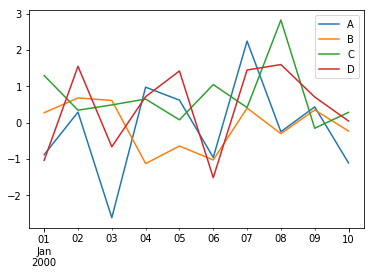

In [220]:
# Import pyplot
from matplotlib import pyplot as plt

df =pd.DataFrame(np.random.randn(10,4),index= pd.date_range('1/1/2000',periods=10), columns= list('ABCD'))
df.plot()
plt.show()

In [223]:
df = pd.DataFrame(np.random.rand(10,4),columns= ['a','b','c','d'])
print(df)

          a         b         c         d
0  0.651310  0.572708  0.546888  0.583815
1  0.857434  0.437505  0.569201  0.725067
2  0.798433  0.483011  0.026130  0.329107
3  0.892946  0.570720  0.834565  0.682575
4  0.786078  0.518220  0.567601  0.050740
5  0.016934  0.618166  0.143152  0.673051
6  0.270945  0.643369  0.209758  0.942309
7  0.888801  0.584911  0.126026  0.199088
8  0.516398  0.251203  0.720493  0.287118
9  0.927048  0.158957  0.367399  0.664972


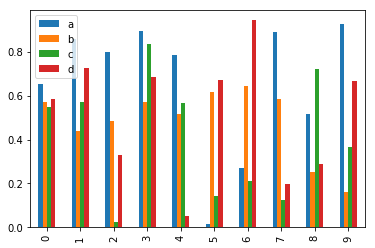

In [224]:
# Gráfico de barras
df.plot.bar()

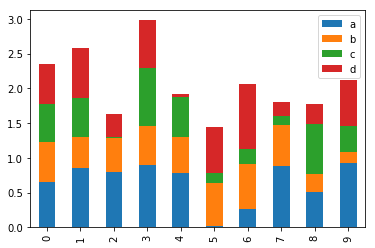

In [225]:
# Gráficos de barras empilhado
df.plot.bar(stacked=True)

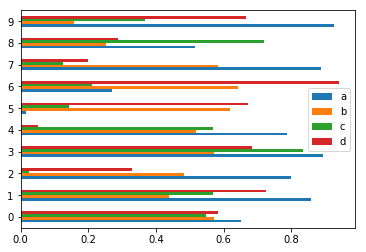

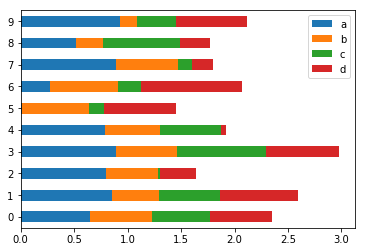

In [226]:
df.plot.barh()
df.plot.barh(stacked=True)

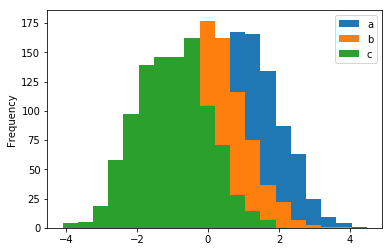

In [228]:
df=pd.DataFrame({'a':np.random.randn(1000)+1,'b':np.random.randn(1000),'c':
np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

# Histogramas
df.plot.hist(bins=20)

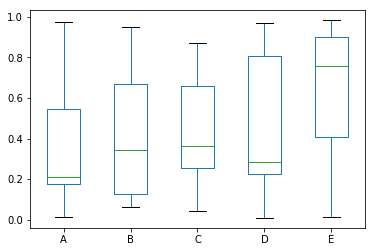

In [229]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
# Box Plots
df.plot.box()

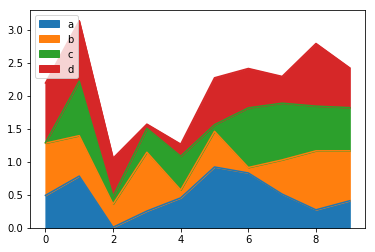

In [230]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
# Gráficos de área
df.plot.area()

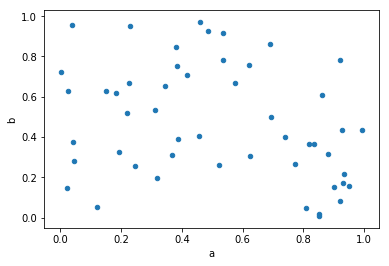

In [231]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
# Scatter Plot
df.plot.scatter(x='a', y='b')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f76e63c5908>],
      dtype=object)

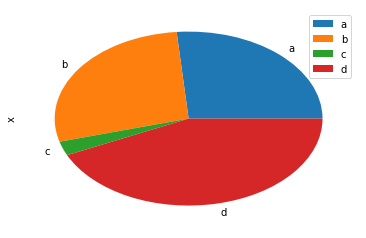

In [232]:
df = pd.DataFrame(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], columns=['x'])
# Pie Charts
df.plot.pie(subplots=True)